### Copyright © 2021, Chloe Wang

# Summary of Results

## Training Data Results

The best model uses boosting. It was trained using the large data set. See below for codes.

**Training MSE:** 0.10942 \
**Validation MSE:** 0.11084

**Training R-squared:** 0.81664 \
**Validation R-squared:** 0.81287

**Key Features**\
The most important features in constructing more accurate predictions are:\
![A4_ImportantFeats](A4_ImportantFeatures.png)

## Test Data Results

**Training MSE:** 0.11084\
**Test MSE:** 0.11197

**Training R-squared:** 0.81287\
**Test R-squared:**  0.81275

# Codes

In [20]:
# importing commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libaries for modelling and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# scoring metrics
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
# reading the two csv files
small_df = pd.read_csv('6Z. final_predcomp_training_data_small.csv')
large_df = pd.read_csv('6Z. final_predcomp_training_data_large.csv')

In [4]:
# let's quickly look at the summary statistics
small_df.describe()

,id,price,year,odometer,cylinders,description_length,description_credit,description_owner,description_badcredit
count,2.999900e+04,29999.000000,29933.000000,26728.000000,19101.000000,29217.000000,29999.000000,29999.000000,29999.000000
mean,7.235216e+09,15879.012534,2010.724184,94720.290482,5.890425,2352.681521,0.413047,0.187906,0.155205
std,4.594456e+06,11152.826912,8.579819,61748.952567,1.609066,2120.058619,0.492389,0.390644,0.362106
min,7.213844e+09,2000.000000,1923.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,7.231904e+09,6900.000000,2008.000000,42790.000000,4.000000,437.000000,0.000000,0.000000,0.000000
50%,7.236398e+09,12990.000000,2013.000000,90656.000000,6.000000,1808.000000,0.000000,0.000000,0.000000
75%,7.239320e+09,22990.000000,2016.000000,135740.250000,8.000000,4140.000000,1.000000,0.000000,0.000000
max,7.241018e+09,50000.000000,2021.000000,500000.000000,12.000000,9994.000000,1.000000,1.000000,1.000000


In [5]:
# missing values in the small dataset
small_df.isna().sum()

id                           0
price                        0
year                        66
odometer                  3271
cylinders                10898
transmission               126
drive                     8486
type                      7094
paint_color               8585
size                     21039
title_status               140
condition                11750
fuel                       210
state                      403
manufacturer               973
description_length         782
description_credit           0
description_owner            0
description_badcredit        0
dtype: int64

In [6]:
# let's quickly look at the summary statistics
large_df.describe()

,id,price,year,odometer,cylinders,description_length,description_credit,description_owner,description_badcredit
count,3.000000e+05,300000.000000,299376.000000,267456.000000,191090.000000,292201.000000,300000.000000,300000.000000,300000.000000
mean,7.235226e+09,15863.518507,2010.629423,94386.056742,5.888874,2379.174883,0.412167,0.186263,0.155067
std,4.595326e+06,11112.310328,8.771992,61497.290868,1.596020,2146.833466,0.492226,0.389320,0.361969
min,7.208550e+09,2000.000000,1900.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,7.231949e+09,6900.000000,2008.000000,42971.750000,4.000000,439.000000,0.000000,0.000000,0.000000
50%,7.236401e+09,12991.000000,2013.000000,90054.500000,6.000000,1828.000000,0.000000,0.000000,0.000000
75%,7.239318e+09,22900.000000,2016.000000,135166.000000,8.000000,4160.000000,1.000000,0.000000,0.000000
max,7.241019e+09,50000.000000,2021.000000,500000.000000,12.000000,9999.000000,1.000000,1.000000,1.000000


In [7]:
# missing values in the small dataset
large_df.isna().sum()

id                            0
price                         0
year                        624
odometer                  32544
cylinders                108910
transmission               1344
drive                     85050
type                      71880
paint_color               85871
size                     210274
title_status               1398
condition                117743
fuel                       1931
state                      3787
manufacturer              10045
description_length         7799
description_credit            0
description_owner             0
description_badcredit         0
dtype: int64

In [22]:
def missing_value_impute(df):
  # let's create a dummy variable column for missing values by iterating through all columns
  # creating list to contain missing row indices
  missing_row = []

  # iterates through each row of large dataset
  for index, row in df.iterrows():
      
      # checks each column to see if there are any missing values
      missing_series = row.isnull()

      # if any of the columns return true, add to our missing row list
      if missing_series.any():
          missing_row.append(index)
  
  # adding the dummy variable column
  df.loc[missing_row, 'missing_value'] = 1

  # fill the dummy variable columns w/ 0 for rows w/ non-missing data
  df['missing_value'] = df['missing_value'].fillna(0)

  # creating a list for categorical and numerical values
  num_col = ['price', 'year', 'odometer', 'cylinders', 'description_length']

  cat_col = ['transmission', 'drive', 'type', 'paint_color',
            'size', 'title_status', 'condition', 'fuel',
            'state', 'manufacturer', 'description_credit',
             'description_owner', 'description_badcredit', 'missing_value']

  # imputing the missing values using the mean for numerical columns and mode for categorical
  # use for loop to loop through all columns
  for col in df.columns[1:]:
    if col in num_col:
      df[col] = df[col].fillna(df[col].mean())
    elif col in cat_col:
      df[col] = df[col].fillna(df[col].mode().values[0])

In [9]:
# use the created function to impute the missing values and create missing value dummy variable
missing_value_impute(small_df)

In [11]:
# construct logarithm car price feature
small_df['log_price'] = np.log(small_df['price'])

In [23]:
# list of categorical columns
num_col = ['year', 'odometer', 'cylinders', 'description_length']

cat_col = ['transmission', 'drive', 'type', 'paint_color',
          'size', 'title_status', 'condition', 'fuel',
          'state', 'manufacturer', 'description_credit', 'description_owner', 
            'description_badcredit', 'missing_value']

In [24]:
def get_dummies(df):
  '''
  This function takes the train/test dataset and creates dummy variables for the known categorical variables.
  '''
  # using pandas get dummies function to create dummy variables for each categorical item
  dummy_df = pd.get_dummies(df[cat_col[:10]])

  # saving dummy feature names to list
  dummy_features = list(dummy_df.columns)

  # merging original df w/ the new dummy variable columns
  new_df = df.merge(dummy_df, left_index=True, right_index=True)

  # return/output the new merged df and the dummy feature column names
  return new_df, dummy_features

In [14]:
# using function to create new large df and the list of dummy column names
new_small_df, dummy_col = get_dummies(small_df)

# Split data into train and test set

In [16]:
# Set X and y
X = new_small_df.loc[:, num_col + dummy_col]
y = new_small_df['log_price']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Random Forest Regressor

In [17]:
# create random forest regressor model
rf_model = RandomForestRegressor(n_estimators=1000)

# fit model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [18]:
# defining grid search parameters
parameters = {'n_estimators':[int(x) for x in np.linspace(200,2000,10)], 'max_depth':[int(x) for x in np.arange(0,11)], 'max_features':['auto','sqrt']}

In [19]:
# create model
rf_model = RandomForestRegressor()

rf_random = RandomizedSearchCV(rf_model, parameters,n_iter=10, cv = 5, random_state=42, n_jobs=-1, verbose=10)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:  1.7min remaining:   52.7s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:  6.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:  7.4min remaining:   49.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=10)

In [20]:
# display best parametesr
rf_random.best_params_

{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 10}

In [21]:
# create random forest regressor model
rf_model = RandomForestRegressor(n_estimators=2000, max_depth=10, max_features='auto', random_state=42, verbose=10)

# fit random forest regressor model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 2000
building tree 2 of 2000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 2000
building tree 4 of 2000


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 2000
building tree 6 of 2000


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 2000
building tree 8 of 2000


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s


building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building tree 41 of 2000
building tree 42 of 2000
building tree 43 of 2000
building tree 44 of 2000
building tree 45 of 2000
building tree 46 of 2000
building tree 47 of 2000
building tree 48 of 2000
b

building tree 328 of 2000
building tree 329 of 2000
building tree 330 of 2000
building tree 331 of 2000
building tree 332 of 2000
building tree 333 of 2000
building tree 334 of 2000
building tree 335 of 2000
building tree 336 of 2000
building tree 337 of 2000
building tree 338 of 2000
building tree 339 of 2000
building tree 340 of 2000
building tree 341 of 2000
building tree 342 of 2000
building tree 343 of 2000
building tree 344 of 2000
building tree 345 of 2000
building tree 346 of 2000
building tree 347 of 2000
building tree 348 of 2000
building tree 349 of 2000
building tree 350 of 2000
building tree 351 of 2000
building tree 352 of 2000
building tree 353 of 2000
building tree 354 of 2000
building tree 355 of 2000
building tree 356 of 2000
building tree 357 of 2000
building tree 358 of 2000
building tree 359 of 2000
building tree 360 of 2000
building tree 361 of 2000
building tree 362 of 2000
building tree 363 of 2000
building tree 364 of 2000
building tree 365 of 2000
building tre

building tree 644 of 2000
building tree 645 of 2000
building tree 646 of 2000
building tree 647 of 2000
building tree 648 of 2000
building tree 649 of 2000
building tree 650 of 2000
building tree 651 of 2000
building tree 652 of 2000
building tree 653 of 2000
building tree 654 of 2000
building tree 655 of 2000
building tree 656 of 2000
building tree 657 of 2000
building tree 658 of 2000
building tree 659 of 2000
building tree 660 of 2000
building tree 661 of 2000
building tree 662 of 2000
building tree 663 of 2000
building tree 664 of 2000
building tree 665 of 2000
building tree 666 of 2000
building tree 667 of 2000
building tree 668 of 2000
building tree 669 of 2000
building tree 670 of 2000
building tree 671 of 2000
building tree 672 of 2000
building tree 673 of 2000
building tree 674 of 2000
building tree 675 of 2000
building tree 676 of 2000
building tree 677 of 2000
building tree 678 of 2000
building tree 679 of 2000
building tree 680 of 2000
building tree 681 of 2000
building tre

building tree 961 of 2000
building tree 962 of 2000
building tree 963 of 2000
building tree 964 of 2000
building tree 965 of 2000
building tree 966 of 2000
building tree 967 of 2000
building tree 968 of 2000
building tree 969 of 2000
building tree 970 of 2000
building tree 971 of 2000
building tree 972 of 2000
building tree 973 of 2000
building tree 974 of 2000
building tree 975 of 2000
building tree 976 of 2000
building tree 977 of 2000
building tree 978 of 2000
building tree 979 of 2000
building tree 980 of 2000
building tree 981 of 2000
building tree 982 of 2000
building tree 983 of 2000
building tree 984 of 2000
building tree 985 of 2000
building tree 986 of 2000
building tree 987 of 2000
building tree 988 of 2000
building tree 989 of 2000
building tree 990 of 2000
building tree 991 of 2000
building tree 992 of 2000
building tree 993 of 2000
building tree 994 of 2000
building tree 995 of 2000
building tree 996 of 2000
building tree 997 of 2000
building tree 998 of 2000
building tre

building tree 1267 of 2000
building tree 1268 of 2000
building tree 1269 of 2000
building tree 1270 of 2000
building tree 1271 of 2000
building tree 1272 of 2000
building tree 1273 of 2000
building tree 1274 of 2000
building tree 1275 of 2000
building tree 1276 of 2000
building tree 1277 of 2000
building tree 1278 of 2000
building tree 1279 of 2000
building tree 1280 of 2000
building tree 1281 of 2000
building tree 1282 of 2000
building tree 1283 of 2000
building tree 1284 of 2000
building tree 1285 of 2000
building tree 1286 of 2000
building tree 1287 of 2000
building tree 1288 of 2000
building tree 1289 of 2000
building tree 1290 of 2000
building tree 1291 of 2000
building tree 1292 of 2000
building tree 1293 of 2000
building tree 1294 of 2000
building tree 1295 of 2000
building tree 1296 of 2000
building tree 1297 of 2000
building tree 1298 of 2000
building tree 1299 of 2000
building tree 1300 of 2000
building tree 1301 of 2000
building tree 1302 of 2000
building tree 1303 of 2000
b

building tree 1571 of 2000
building tree 1572 of 2000
building tree 1573 of 2000
building tree 1574 of 2000
building tree 1575 of 2000
building tree 1576 of 2000
building tree 1577 of 2000
building tree 1578 of 2000
building tree 1579 of 2000
building tree 1580 of 2000
building tree 1581 of 2000
building tree 1582 of 2000
building tree 1583 of 2000
building tree 1584 of 2000
building tree 1585 of 2000
building tree 1586 of 2000
building tree 1587 of 2000
building tree 1588 of 2000
building tree 1589 of 2000
building tree 1590 of 2000
building tree 1591 of 2000
building tree 1592 of 2000
building tree 1593 of 2000
building tree 1594 of 2000
building tree 1595 of 2000
building tree 1596 of 2000
building tree 1597 of 2000
building tree 1598 of 2000
building tree 1599 of 2000
building tree 1600 of 2000
building tree 1601 of 2000
building tree 1602 of 2000
building tree 1603 of 2000
building tree 1604 of 2000
building tree 1605 of 2000
building tree 1606 of 2000
building tree 1607 of 2000
b

building tree 1875 of 2000
building tree 1876 of 2000
building tree 1877 of 2000
building tree 1878 of 2000
building tree 1879 of 2000
building tree 1880 of 2000
building tree 1881 of 2000
building tree 1882 of 2000
building tree 1883 of 2000
building tree 1884 of 2000
building tree 1885 of 2000
building tree 1886 of 2000
building tree 1887 of 2000
building tree 1888 of 2000
building tree 1889 of 2000
building tree 1890 of 2000
building tree 1891 of 2000
building tree 1892 of 2000
building tree 1893 of 2000
building tree 1894 of 2000
building tree 1895 of 2000
building tree 1896 of 2000
building tree 1897 of 2000
building tree 1898 of 2000
building tree 1899 of 2000
building tree 1900 of 2000
building tree 1901 of 2000
building tree 1902 of 2000
building tree 1903 of 2000
building tree 1904 of 2000
building tree 1905 of 2000
building tree 1906 of 2000
building tree 1907 of 2000
building tree 1908 of 2000
building tree 1909 of 2000
building tree 1910 of 2000
building tree 1911 of 2000
b

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  4.0min finished


RandomForestRegressor(max_depth=10, n_estimators=2000, random_state=42,
                      verbose=10)

In [22]:
# creating y predictions for training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | el

In [23]:
# rf model training score
rf_train_mse = mean_squared_error(y_train_pred, y_train)
rf_test_mse = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train MSE: {rf_train_mse}')
print(f'RF Model Test MSE: {rf_test_mse}')

RF Model Train MSE: 0.10420658223840724
RF Model Test MSE: 0.14381869624251067


In [24]:
# rf model training score
rf_train_r2 = r2_score(y_train_pred, y_train)
rf_test_r2 = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train R2: {rf_train_r2}')
print(f'RF Model Test R2: {rf_test_r2}')

RF Model Train R2: 0.7624144566029152
RF Model Test R2: 0.14381869624251067


Initial model with default parameters aren't too great. Need to tune parameters to get a better prediction on the test/validation set.

In [25]:
# create model again this time using m=sqrt(p)
rf_model = RandomForestRegressor(max_features='sqrt')
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt')

In [26]:
# creating y predictions for training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [27]:
# rf model training score
rf_train_mse = mean_squared_error(y_train_pred, y_train)
rf_test_mse = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train MSE: {rf_train_mse}')
print(f'RF Model Test MSE: {rf_test_mse}')

RF Model Train MSE: 0.016358273992646385
RF Model Test MSE: 0.12262850350577952


In [28]:
# rf model training score
rf_train_r2 = r2_score(y_train_pred, y_train)
rf_test_r2 = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train R2: {rf_train_r2}')
print(f'RF Model Test R2: {rf_test_r2}')

RF Model Train R2: 0.9669196238300526
RF Model Test R2: 0.12262850350577952


Let's try with more trees this time around.

In [29]:
# create model again this time using m=sqrt(p) and 500 regressor trees
rf_model = RandomForestRegressor(n_estimators=500, max_features='sqrt')
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500)

In [30]:
# rf model training score
rf_train_mse = mean_squared_error(y_train_pred, y_train)
rf_test_mse = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train MSE: {rf_train_mse}')
print(f'RF Model Test MSE: {rf_test_mse}')

RF Model Train MSE: 0.016358273992646385
RF Model Test MSE: 0.12262850350577952


In [31]:
# rf model training score
rf_train_r2 = r2_score(y_train_pred, y_train)
rf_test_r2 = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train R2: {rf_train_r2}')
print(f'RF Model Test R2: {rf_test_r2}')

RF Model Train R2: 0.9669196238300526
RF Model Test R2: 0.12262850350577952


Trying with 200 Trees

In [32]:
# create model again this time using m=sqrt(p)
rf_model = RandomForestRegressor(n_estimators=200, max_features='sqrt')
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [33]:
# rf model training score
rf_train_mse = mean_squared_error(y_train_pred, y_train)
rf_test_mse = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train MSE: {rf_train_mse}')
print(f'RF Model Test MSE: {rf_test_mse}')

RF Model Train MSE: 0.016358273992646385
RF Model Test MSE: 0.12262850350577952


In [34]:
# rf model training score
rf_train_r2 = r2_score(y_train_pred, y_train)
rf_test_r2 = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train R2: {rf_train_r2}')
print(f'RF Model Test R2: {rf_test_r2}')

RF Model Train R2: 0.9669196238300526
RF Model Test R2: 0.12262850350577952


# Trying another grid search with only sqrt(p) features

In [35]:
# defining grid search parameters
parameters = {'n_estimators':[int(x) for x in np.arange(2000,4000,200)], 'max_depth':[int(x) for x in np.arange(0,11)], 'max_features':['sqrt']}

In [36]:
%%time
# create model
rf_model = RandomForestRegressor()

rf_random = RandomizedSearchCV(rf_model, parameters,n_iter=50, cv = 5, random_state=42, n_jobs=-1, verbose=10)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 1

Wall time: 13min 10s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10],
                                        'max_features': ['sqrt'],
                                        'n_estimators': [2000, 2200, 2400, 2600,
                                                         2800, 3000, 3200, 3400,
                                                         3600, 3800]},
                   random_state=42, verbose=10)

In [37]:
# display best parameters for random forest regressor
rf_random.best_params_

{'n_estimators': 3600, 'max_features': 'sqrt', 'max_depth': 10}

In [38]:
# create model again this time using {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 3600} from the grid search
rf_model = RandomForestRegressor(n_estimators=3600, max_features='sqrt', max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=3600)

In [39]:
# creating y predictions for training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [40]:
# rf model training score
rf_train_mse = mean_squared_error(y_train_pred, y_train)
rf_test_mse = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train MSE: {rf_train_mse}')
print(f'RF Model Test MSE: {rf_test_mse}')

RF Model Train MSE: 0.17961789352897967
RF Model Test MSE: 0.20225153692274275


In [41]:
# rf model training score
rf_train_r2 = r2_score(y_train_pred, y_train)
rf_test_r2 = mean_squared_error(y_test_pred, y_test)

# display train and test mse
print(f'RF Model Train R2: {rf_train_r2}')
print(f'RF Model Test R2: {rf_test_r2}')

RF Model Train R2: 0.2150654260162994
RF Model Test R2: 0.20225153692274275


The R2 score for the random forest regressor algorithm is low when evaluating the test set. Move on to trying AdaBoost and Gradient Boosting algorithms.

# AdaBoost Regressor

In [42]:
# creating and fitting adaboost model
ab_model1 = AdaBoostRegressor()
ab_model1.fit(X_train,y_train)

AdaBoostRegressor()

In [43]:
# finding y^ for train and test
ab_y_train_pred1 = ab_model1.predict(X_train)
ab_y_test_pred1 = ab_model1.predict(X_test)

In [44]:
# calculating MSE and R2 scores for train and test
ab_train_mse1 = mean_squared_error(y_train, ab_y_train_pred1)
ab_test_mse1 = mean_squared_error(y_test, ab_y_test_pred1)

ab_train_r21 = r2_score(y_train, ab_y_train_pred1)
ab_test_r21 = r2_score(y_test, ab_y_test_pred1)

# display MSE and R2 scores
print(f'AB Model Train MSE: {ab_train_mse1}')
print(f'AB Model Test MSE: {ab_test_mse1}')

print(f'AB Model Train R2: {ab_train_r21}')
print(f'AB Model Test R2: {ab_test_r21}')

AB Model Train MSE: 0.24503291539581498
AB Model Test MSE: 0.25577657332965764
AB Model Train R2: 0.5872390977154249
AB Model Test R2: 0.5801614599424069


This does better than the random forest regressor so let's try tuning this model.

Let's try tuning our hyper parameters with a randomized grid search.

In [45]:
# defining grid search parameters
parameters = {'n_estimators':[int(x) for x in np.arange(50,500,50)], 'learning_rate': [0.001, 0.01, 0.1]}

In [46]:
%%time
# create model
ab_model = AdaBoostRegressor()

ab_random = RandomizedSearchCV(ab_model, parameters,n_iter=50, cv = 5, random_state=42, n_jobs=-1, verbose=10)

ab_random.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\s64wa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 126 out of 135 | elapsed: 17.4min re

Wall time: 18min 3s


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450]},
                   random_state=42, verbose=10)

In [47]:
# displaying best parametesr
ab_random.best_params_

{'n_estimators': 50, 'learning_rate': 0.1}

In [48]:
# fitting a new adaboost model with the parameters found above (n_estimators = 100)
ab_model2 = AdaBoostRegressor(n_estimators=100)
ab_model2.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=100)

In [49]:
# finding y^ for train and test
ab_y_train_pred2 = ab_model2.predict(X_train)
ab_y_test_pred2 = ab_model2.predict(X_test)

In [50]:
# calculating MSE and R2 scores for train and test
ab_train_mse2 = mean_squared_error(y_train, ab_y_train_pred2)
ab_test_mse2 = mean_squared_error(y_test, ab_y_test_pred2)

ab_train_r22 = r2_score(y_train, ab_y_train_pred2)
ab_test_r22 = r2_score(y_test, ab_y_test_pred2)

# display MSE and R2 scores
print(f'AB Model Train MSE: {ab_train_mse2}')
print(f'AB Model Test MSE: {ab_test_mse2}')

print(f'AB Model Train R2: {ab_train_r22}')
print(f'AB Model Test R2: {ab_test_r22}')

AB Model Train MSE: 0.24470788080565936
AB Model Test MSE: 0.2555989390547531
AB Model Train R2: 0.5877866224040555
AB Model Test R2: 0.5804530336141831


After tuning, our best model returns an MSE of about 0.245 and an R2 score of 0.585. Let's try the gradient boosting model to see if it does better.

# Gradient Boosting Regressor

In [52]:
# creating a gradient boosting regressor
gb_model1 = GradientBoostingRegressor()

# fitting the model
gb_model1.fit(X_train,y_train)

GradientBoostingRegressor()

In [61]:
# finding y^ for train and test
gb_y_train_pred1 = gb_model1.predict(X_train)
gb_y_test_pred1 = gb_model1.predict(X_test)

In [62]:
# calculating MSE and R2 scores for train and test
gb_train_mse1 = mean_squared_error(y_train, gb_y_train_pred1)
gb_test_mse1 = mean_squared_error(y_test, gb_y_test_pred1)

gb_train_r21 = r2_score(y_train, gb_y_train_pred1)
gb_test_r21 = r2_score(y_test, gb_y_test_pred1)

# display MSE and R2 scores
print(f'GB Model Train MSE: {gb_train_mse1}')
print(f'GB Model Test MSE: {gb_test_mse1}')

print(f'GB Model Train R2: {gb_train_r21}')
print(f'GB Model Test R2: {gb_test_r21}')

GB Model Train MSE: 0.13026160586042831
GB Model Test MSE: 0.14332188611048433
GB Model Train R2: 0.7805727533334226
GB Model Test R2: 0.7647476051476629


The gradient boosting regressor does better than the adaboost and random forest regressor model. Let's try tuning our hyper parameters to improve it.

In [63]:
# defining grid search parameters
parameters = {'n_estimators':[int(x) for x in np.arange(50,750,50)], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [1,2,3]}

In [64]:
%%time
# create model
gb_model = GradientBoostingRegressor()

gb_random = GridSearchCV(gb_model, parameters, cv = 5, n_jobs=-1, verbose=10)

gb_random.fit(X_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

Wall time: 18min 16s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700]},
             verbose=10)

In [65]:
# displaying the best parameters, it seems like the best learning rate is about
gb_random.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}

In [66]:
# creating a new gradient boosting regressor with the parameters found above
gb_model2 = GradientBoostingRegressor(n_estimators=450, learning_rate=0.1)
gb_model2.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=450)

In [67]:
# finding y^ for train and test
gb_y_train_pred2 = gb_model2.predict(X_train)
gb_y_test_pred2 = gb_model2.predict(X_test)

In [68]:
# calculating MSE and R2 scores for train and test
gb_train_mse2 = mean_squared_error(y_train, gb_y_train_pred2)
gb_test_mse2 = mean_squared_error(y_test, gb_y_test_pred2)

gb_train_r22 = r2_score(y_train, gb_y_train_pred2)
gb_test_r22 = r2_score(y_test, gb_y_test_pred2)

# display MSE and R2 scores
print(f'GB Model Train MSE: {gb_train_mse2}')
print(f'GB Model Test MSE: {gb_test_mse2}')

print(f'GB Model Train R2: {gb_train_r22}')
print(f'GB Model Test R2: {gb_test_r22}')

GB Model Train MSE: 0.10275060459001258
GB Model Test MSE: 0.12243594068740844
GB Model Train R2: 0.8269153668912207
GB Model Test R2: 0.799030357160472


# Gradient Boosting Tuning Part 2

In [69]:
# defining grid search parameters
parameters = {'n_estimators':[int(x) for x in np.arange(400,750,50)], 'learning_rate': [0.01, 0.1], 'max_depth': [1,2,3]}

In [70]:
%%time
# create model
gb_model = GradientBoostingRegressor()

gb_random = GridSearchCV(gb_model, parameters, cv = 5, n_jobs=-1, verbose=10)

gb_random.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  

Wall time: 10min 18s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 2, 3],
                         'n_estimators': [400, 450, 500, 550, 600, 650, 700]},
             verbose=10)

In [71]:
# displaying new best parameters
gb_random.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}

In [72]:
# Trying model 3 w/ new parameters
gb_model3 = GradientBoostingRegressor(n_estimators=700, learning_rate=0.1)
gb_model3.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=700)

In [73]:
# finding y^ for train and test
gb_y_train_pred3 = gb_model3.predict(X_train)
gb_y_test_pred3 = gb_model3.predict(X_test)

In [74]:
# calculating MSE and R2 scores for train and test
gb_train_mse3 = mean_squared_error(y_train, gb_y_train_pred3)
gb_test_mse3 = mean_squared_error(y_test, gb_y_test_pred3)

gb_train_r23 = r2_score(y_train, gb_y_train_pred3)
gb_test_r23 = r2_score(y_test, gb_y_test_pred3)

# display MSE and R2 scores
print(f'GB Model Train MSE: {gb_train_mse3}')
print(f'GB Model Test MSE: {gb_test_mse3}')

print(f'GB Model Train R2: {gb_train_r23}')
print(f'GB Model Test R2: {gb_test_r23}')

GB Model Train MSE: 0.09380170225828412
GB Model Test MSE: 0.11813565863624838
GB Model Train R2: 0.8419899008367278
GB Model Test R2: 0.8060889556657698


## Gradient Boosting Model Tuning Part 3

In [75]:
# Using cross_validate, let's run through a few different model scenarios
# It looks like our MSE and R2 scores improve as we use more n_estimators
# let's plot this and see what's a good cut off number for n_estimators is
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse=[]
test_mse=[]
train_r2=[]
test_r2=[]

# use for loop for n_estimators from 400 to 1250 in steps of 50
for n in np.arange(400, 1250, 50):
  # display n_estimator
  print(n)

  # create model
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=1)

  # save model score in score
  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  # add the individual scores to the appropriate list for train_mse, test_mse, train_r2 and test_r2
  n_estimators_list.append(n)
  train_mse.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2.append(np.abs(score['train_r2'].mean()))
  test_r2.append(np.abs(score['test_r2'].mean()))

400


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.5s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    6.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


450


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.3s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.9s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    8.0s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


550


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.1s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    9.2s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.2s finished


600


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.2s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   10.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished


650


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.6s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.6s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished


700


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.5s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.5s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


750


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.7s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.8s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


800


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.8s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   12.9s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.9s finished


850


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.6s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   13.8s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


900


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.3s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   15.4s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


950


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.1s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   17.1s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.8s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   16.8s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished


1050


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.0s remaining:   27.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   18.2s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1100


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.6s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   19.6s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1150


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.4s remaining:   29.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   19.6s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s finished


1200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   19.1s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.3s finished


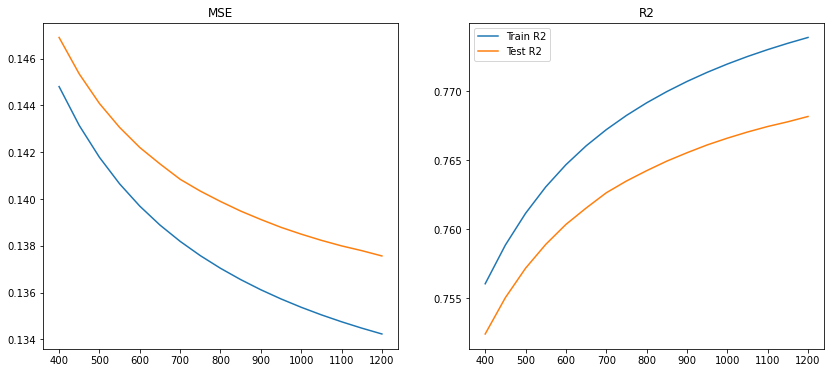

In [76]:
# plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(n_estimators_list, train_mse, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse, label='Test MSE')
axs[0].set_title('MSE')

axs[1].plot(n_estimators_list, train_r2, label='Train R2')
axs[1].plot(n_estimators_list, test_r2, label='Test R2')
axs[1].set_title('R2')

plt.legend()

plt.show()

In [77]:
# repeating the same process but using a max_depth of 2
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse_2=[]
test_mse_2=[]
train_r2_2=[]
test_r2_2=[]

for n in np.arange(400, 1250, 50):
  print(n)
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=2)

  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  n_estimators_list.append(n)
  train_mse_2.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse_2.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2_2.append(np.abs(score['train_r2'].mean()))
  test_r2_2.append(np.abs(score['test_r2'].mean()))

400


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.9s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   12.9s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.0s finished


450


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.4s remaining:   21.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   14.4s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.5s finished


500


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.4s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   15.5s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


550


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.4s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   18.5s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.5s finished


600


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.8s remaining:   29.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   19.8s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.9s finished


650


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.0s remaining:   31.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   21.0s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


700


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.7s remaining:   34.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   22.7s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.9s finished


750


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.7s remaining:   37.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   24.8s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


800


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.4s remaining:   38.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   25.5s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


850


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.5s remaining:   41.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   27.6s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


900


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.3s remaining:   49.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   33.3s remaining:   22.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.4s finished


950


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.8s remaining:   50.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   33.9s remaining:   22.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.1s remaining:   49.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   33.1s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.2s finished


1050


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.5s remaining:   56.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   37.5s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.6s finished


1100


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   34.7s remaining:   52.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   34.7s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.8s finished


1150


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.6s remaining:   50.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   33.8s remaining:   22.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1200


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.1s remaining:   52.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   35.2s remaining:   23.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.3s finished


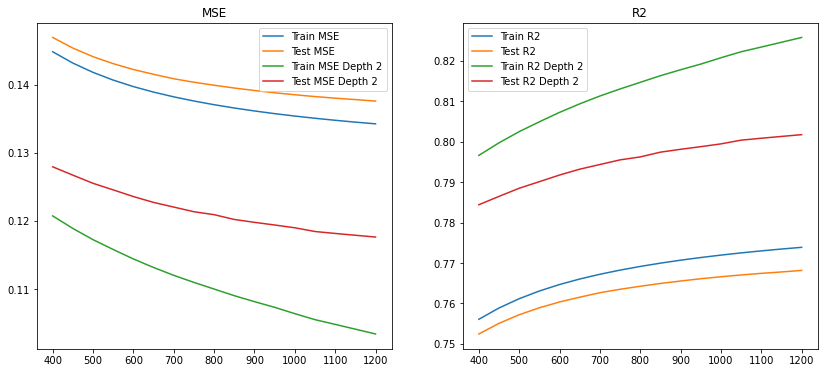

In [78]:
# plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(n_estimators_list, train_mse, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse, label='Test MSE')
axs[0].plot(n_estimators_list, train_mse_2, label='Train MSE Depth 2')
axs[0].plot(n_estimators_list, test_mse_2, label='Test MSE Depth 2')
axs[0].set_title('MSE')
axs[0].legend()

axs[1].plot(n_estimators_list, train_r2, label='Train R2')
axs[1].plot(n_estimators_list, test_r2, label='Test R2')
axs[1].plot(n_estimators_list, train_r2_2, label='Train R2 Depth 2')
axs[1].plot(n_estimators_list, test_r2_2, label='Test R2 Depth 2')
axs[1].set_title('R2')
axs[1].legend()

plt.show()

In [79]:
# repeating the process but using a max depth of 3
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse_3=[]
test_mse_3=[]
train_r2_3=[]
test_r2_3=[]

for n in np.arange(400, 1250, 50):
  print(n)
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=3)

  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  n_estimators_list.append(n)
  train_mse_3.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse_3.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2_3.append(np.abs(score['train_r2'].mean()))
  test_r2_3.append(np.abs(score['test_r2'].mean()))

400


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.5s remaining:   26.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   17.8s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


450


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.0s remaining:   31.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   21.3s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.5s finished


500


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.1s remaining:   34.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   23.2s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


550


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.2s remaining:   37.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   25.4s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


600


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.1s remaining:   42.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   28.1s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


650


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.9s remaining:   43.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   29.1s remaining:   19.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


700


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.9s remaining:   46.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   30.9s remaining:   20.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


750


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   34.8s remaining:   52.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   34.9s remaining:   23.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.0s finished


800


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.5s remaining:   53.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   35.6s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.6s finished


850


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.5s remaining:   57.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   38.6s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.6s finished


900


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   39.6s remaining:   59.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   39.8s remaining:   26.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


950


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   44.2s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   44.3s remaining:   29.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.7s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   46.8s remaining:   31.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1050


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.6s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   46.8s remaining:   31.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1100


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   49.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   50.0s remaining:   33.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.2s finished


1150


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   50.7s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   50.9s remaining:   33.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1200


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.2s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   55.5s remaining:   37.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.7s finished


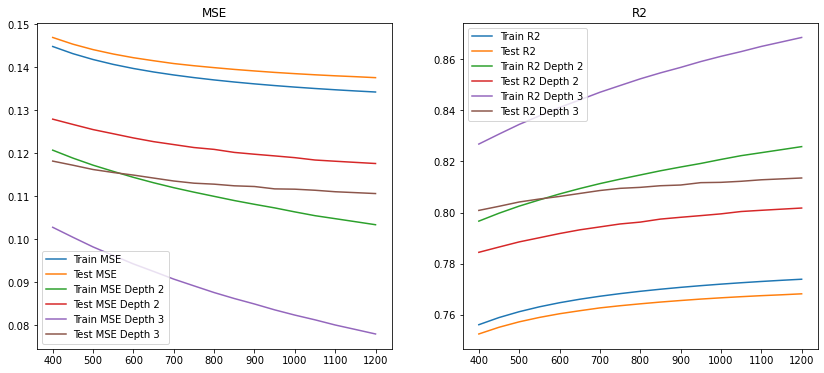

In [80]:
#plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(n_estimators_list, train_mse, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse, label='Test MSE')
axs[0].plot(n_estimators_list, train_mse_2, label='Train MSE Depth 2')
axs[0].plot(n_estimators_list, test_mse_2, label='Test MSE Depth 2')
axs[0].plot(n_estimators_list, train_mse_3, label='Train MSE Depth 3')
axs[0].plot(n_estimators_list, test_mse_3, label='Test MSE Depth 3')
axs[0].set_title('MSE')
axs[0].legend()

axs[1].plot(n_estimators_list, train_r2, label='Train R2')
axs[1].plot(n_estimators_list, test_r2, label='Test R2')
axs[1].plot(n_estimators_list, train_r2_2, label='Train R2 Depth 2')
axs[1].plot(n_estimators_list, test_r2_2, label='Test R2 Depth 2')
axs[1].plot(n_estimators_list, train_r2_3, label='Train R2 Depth 3')
axs[1].plot(n_estimators_list, test_r2_3, label='Test R2 Depth 3')
axs[1].set_title('R2')
axs[1].legend()

plt.show()

In [81]:
# Final model
gb_model4 = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.1, max_depth=2)
gb_model4.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=2000)

In [82]:
# finding y^ for train and test
gb_y_train_pred4 = gb_model4.predict(X_train)
gb_y_test_pred4 = gb_model4.predict(X_test)

In [83]:
# calculating MSE and R2 scores for train and test
gb_train_mse4 = mean_squared_error(y_train, gb_y_train_pred4)
gb_test_mse4 = mean_squared_error(y_test, gb_y_test_pred4)

gb_train_r24 = r2_score(y_train, gb_y_train_pred4)
gb_test_r24 = r2_score(y_test, gb_y_test_pred4)

# display MSE and R2 scores
print(f'GB Model Train MSE: {gb_train_mse4}')
print(f'GB Model Test MSE: {gb_test_mse4}')

print(f'GB Model Train R2: {gb_train_r24}')
print(f'GB Model Test R2: {gb_test_r24}')

GB Model Train MSE: 0.09687840957457815
GB Model Test MSE: 0.11878712542540501
GB Model Train R2: 0.8368071502422305
GB Model Test R2: 0.8050196205734468


## Trying to Tune again, this time with larger number of n_estimators

In [84]:
# repeating the same process as above this time using n_estimators from 700 to 2500 in steps of 100 and max depth 1
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse_1_1=[]
test_mse_1_1=[]
train_r2_1_1=[]
test_r2_1_1=[]

for n in np.arange(700, 2600, 100):
  print(n)
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=1)

  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  n_estimators_list.append(n)
  train_mse_1_1.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse_1_1.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2_1_1.append(np.abs(score['train_r2'].mean()))
  test_r2_1_1.append(np.abs(score['test_r2'].mean()))

700


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.8s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    9.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


800


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.0s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   12.0s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


900


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.2s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   13.3s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.4s finished


1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.8s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   14.9s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.9s finished


1100


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.4s remaining:   24.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   16.4s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1200


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.3s remaining:   27.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   18.4s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1300


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.2s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   19.2s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1400


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.7s remaining:   31.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   20.8s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.0s remaining:   33.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   22.1s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.2s finished


1600


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.7s remaining:   35.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   23.7s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.7s finished


1700


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.4s remaining:   38.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   25.5s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1800


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.4s remaining:   39.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   26.4s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.5s finished


1900


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.0s remaining:   42.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   28.0s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.5s remaining:   44.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   29.5s remaining:   19.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.6s finished


2100


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.2s remaining:   46.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   31.6s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2200


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.4s remaining:   48.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   32.6s remaining:   21.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2300


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   34.3s remaining:   51.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   34.4s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2400


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.3s remaining:   56.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   37.4s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   39.1s remaining:   58.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   39.1s remaining:   26.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.1s finished


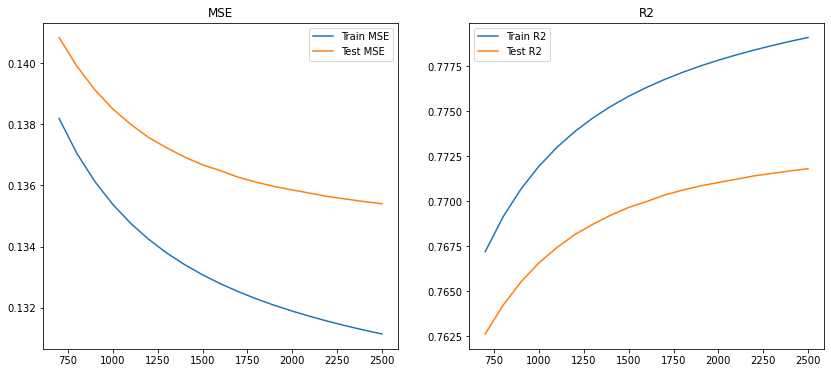

In [85]:
#plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(n_estimators_list, train_mse_1_1, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse_1_1, label='Test MSE')
axs[0].set_title('MSE')
axs[0].legend()

axs[1].plot(n_estimators_list, train_r2_1_1, label='Train R2')
axs[1].plot(n_estimators_list, test_r2_1_1, label='Test R2')
axs[1].set_title('R2')
axs[1].legend()

plt.show()

In [86]:
# repeating the same process as above this time using n_estimators from 700 to 2500 in steps of 100, depth 2
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse_2_2=[]
test_mse_2_2=[]
train_r2_2_2=[]
test_r2_2_2=[]

for n in np.arange(700, 2600, 100):
  print(n)
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=2)

  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  n_estimators_list.append(n)
  train_mse_2_2.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse_2_2.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2_2_2.append(np.abs(score['train_r2'].mean()))
  test_r2_2_2.append(np.abs(score['test_r2'].mean()))

700


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.2s remaining:   31.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   21.3s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


800


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.4s remaining:   35.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   23.4s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


900


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.4s remaining:   39.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   26.5s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.5s finished


1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.7s remaining:   44.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   29.9s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1100


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.1s remaining:   48.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   32.4s remaining:   21.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1200


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.2s remaining:   52.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   35.2s remaining:   23.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.2s finished


1300


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.9s remaining:   58.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   38.9s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.0s finished


1400


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   41.0s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   41.0s remaining:   27.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   45.1s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   45.7s remaining:   30.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1600


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   47.2s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   47.3s remaining:   31.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1700


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.0s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   52.0s remaining:   34.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1800


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.5s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   55.7s remaining:   37.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1900


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.8s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   55.8s remaining:   37.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.0min remaining:   41.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2100


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.1min remaining:   43.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2200


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.1min remaining:   45.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2300


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.2min remaining:   47.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2400


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.2min remaining:   47.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.2min remaining:   48.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


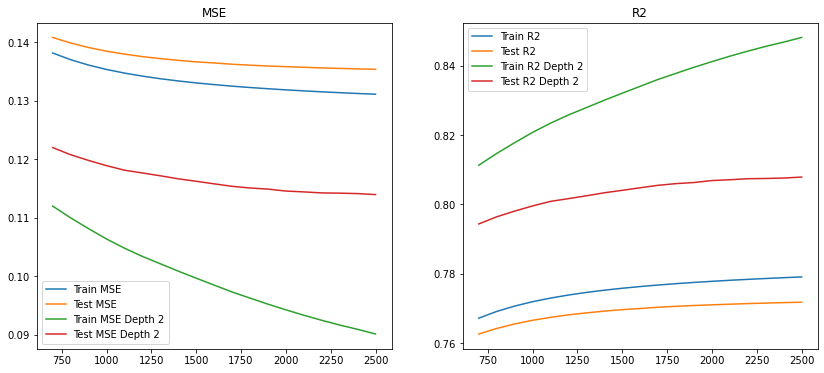

In [87]:
# plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(n_estimators_list, train_mse_1_1, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse_1_1, label='Test MSE')
axs[0].plot(n_estimators_list, train_mse_2_2, label='Train MSE Depth 2')
axs[0].plot(n_estimators_list, test_mse_2_2, label='Test MSE Depth 2')
axs[0].set_title('MSE')
axs[0].legend()

axs[1].plot(n_estimators_list, train_r2_1_1, label='Train R2')
axs[1].plot(n_estimators_list, test_r2_1_1, label='Test R2')
axs[1].plot(n_estimators_list, train_r2_2_2, label='Train R2 Depth 2')
axs[1].plot(n_estimators_list, test_r2_2_2, label='Test R2 Depth 2')
axs[1].set_title('R2')
axs[1].legend()

plt.show()

## Gradient Boosting Model Tuning part 4

In [88]:
# repeating the same process as above this time using n_estimators from 1000 to 4000 in steps of 500, depth 1
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse_1_2=[]
test_mse_1_2=[]
train_r2_1_2=[]
test_r2_1_2=[]

for n in np.arange(1000, 4000, 500):
  print(n)
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=1)

  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  n_estimators_list.append(n)
  train_mse_1_2.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse_1_2.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2_1_2.append(np.abs(score['train_r2'].mean()))
  test_r2_1_2.append(np.abs(score['test_r2'].mean()))

1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.9s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   14.9s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.1s remaining:   33.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   22.1s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.2s finished


2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.4s remaining:   44.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   29.5s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   36.8s remaining:   55.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   37.2s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


3000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   45.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   45.8s remaining:   30.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


3500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   51.9s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   52.0s remaining:   34.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.4s finished


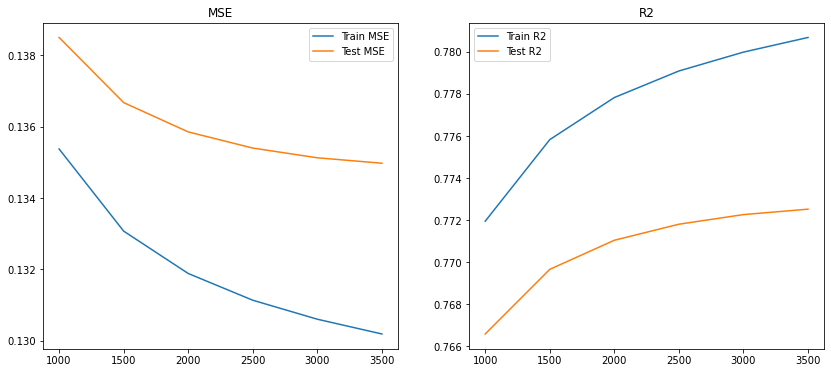

In [89]:
# plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(n_estimators_list, train_mse_1_2, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse_1_2, label='Test MSE')
axs[0].set_title('MSE')
axs[0].legend()

axs[1].plot(n_estimators_list, train_r2_1_2, label='Train R2')
axs[1].plot(n_estimators_list, test_r2_1_2, label='Test R2')
axs[1].set_title('R2')
axs[1].legend()

plt.show()

In [90]:
# repeating the same process as above this time using n_estimators from 1000 to 4000 in steps of 500, max depth 2
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse_2_2=[]
test_mse_2_2=[]
train_r2_2_2=[]
test_r2_2_2=[]

for n in np.arange(1000, 4000, 500):
  print(n)
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=2)

  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  n_estimators_list.append(n)
  train_mse_2_2.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse_2_2.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2_2_2.append(np.abs(score['train_r2'].mean()))
  test_r2_2_2.append(np.abs(score['test_r2'].mean()))

1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.4s remaining:   45.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   30.4s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.5s finished


1500


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   47.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   47.2s remaining:   31.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.3s finished


2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   58.6s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   58.7s remaining:   39.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.2min remaining:   49.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


3000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.5min remaining:   59.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


3500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.7min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


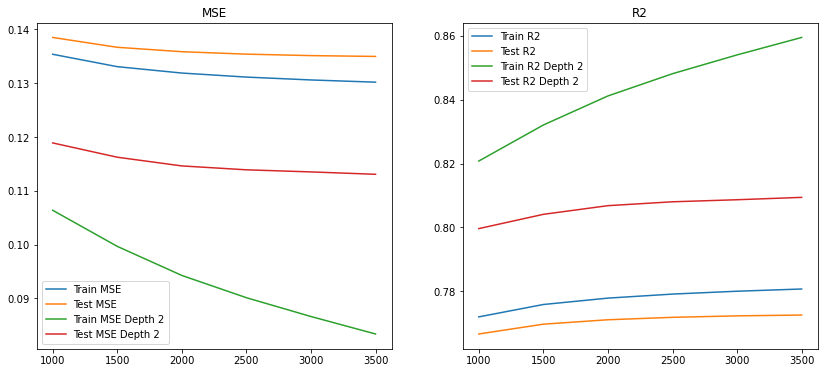

In [91]:
# plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(n_estimators_list, train_mse_1_2, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse_1_2, label='Test MSE')
axs[0].plot(n_estimators_list, train_mse_2_2, label='Train MSE Depth 2')
axs[0].plot(n_estimators_list, test_mse_2_2, label='Test MSE Depth 2')
axs[0].set_title('MSE')
axs[0].legend()

axs[1].plot(n_estimators_list, train_r2_1_2, label='Train R2')
axs[1].plot(n_estimators_list, test_r2_1_2, label='Test R2')
axs[1].plot(n_estimators_list, train_r2_2_2, label='Train R2 Depth 2')
axs[1].plot(n_estimators_list, test_r2_2_2, label='Test R2 Depth 2')
axs[1].set_title('R2')
axs[1].legend()

plt.show()

In [92]:
# repeating the same process as above this time using n_estimators from 1000 to 4000 in steps of 500, max depth 2
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse_3_2=[]
test_mse_3_2=[]
train_r2_3_2=[]
test_r2_3_2=[]

for n in np.arange(1000, 4000, 500):
  print(n)
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=3)

  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  n_estimators_list.append(n)
  train_mse_3_2.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse_3_2.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2_3_2.append(np.abs(score['train_r2'].mean()))
  test_r2_3_2.append(np.abs(score['test_r2'].mean()))

1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   46.4s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.1min remaining:   44.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.6min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


3000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


3500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.7min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.7min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


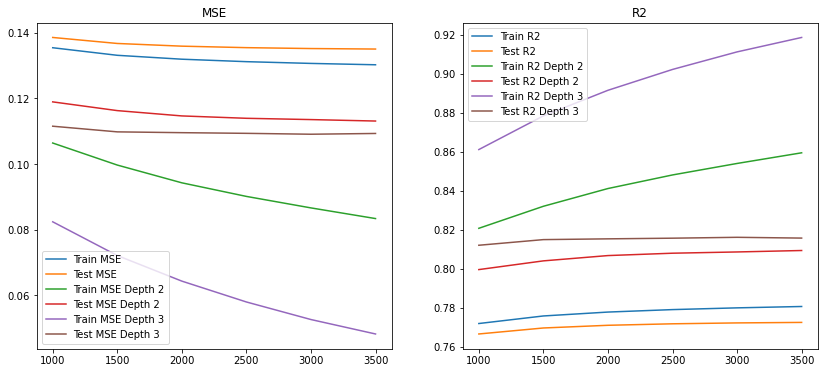

In [93]:
# plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].plot(n_estimators_list, train_mse_1_2, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse_1_2, label='Test MSE')
axs[0].plot(n_estimators_list, train_mse_2_2, label='Train MSE Depth 2')
axs[0].plot(n_estimators_list, test_mse_2_2, label='Test MSE Depth 2')
axs[0].plot(n_estimators_list, train_mse_3_2, label='Train MSE Depth 3')
axs[0].plot(n_estimators_list, test_mse_3_2, label='Test MSE Depth 3')
axs[0].set_title('MSE')
axs[0].legend()

axs[1].plot(n_estimators_list, train_r2_1_2, label='Train R2')
axs[1].plot(n_estimators_list, test_r2_1_2, label='Test R2')
axs[1].plot(n_estimators_list, train_r2_2_2, label='Train R2 Depth 2')
axs[1].plot(n_estimators_list, test_r2_2_2, label='Test R2 Depth 2')
axs[1].plot(n_estimators_list, train_r2_3_2, label='Train R2 Depth 3')
axs[1].plot(n_estimators_list, test_r2_3_2, label='Test R2 Depth 3')
axs[1].set_title('R2')
axs[1].legend()

plt.show()

In [94]:
# repeating the same process as above this time using n_estimators from 1000 to 4000 in steps of 500, max depth 3
scoring = ['neg_mean_squared_error', 'r2']
n_estimators_list = []
train_mse_4_2=[]
test_mse_4_2=[]
train_r2_4_2=[]
test_r2_4_2=[]

for n in np.arange(1000, 4000, 500):
  print(n)
  gb_model_tune = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=4)

  score = cross_validate(gb_model_tune, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True, verbose = 10)
  
  n_estimators_list.append(n)
  train_mse_4_2.append(np.abs(score['train_neg_mean_squared_error'].mean()))
  test_mse_4_2.append(np.abs(score['test_neg_mean_squared_error'].mean()))
  train_r2_4_2.append(np.abs(score['train_r2'].mean()))
  test_r2_4_2.append(np.abs(score['test_r2'].mean()))

1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   59.0s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   59.1s remaining:   39.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


1500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.5min remaining:   59.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.0min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


2500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


3000


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


3500


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.5min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.5min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


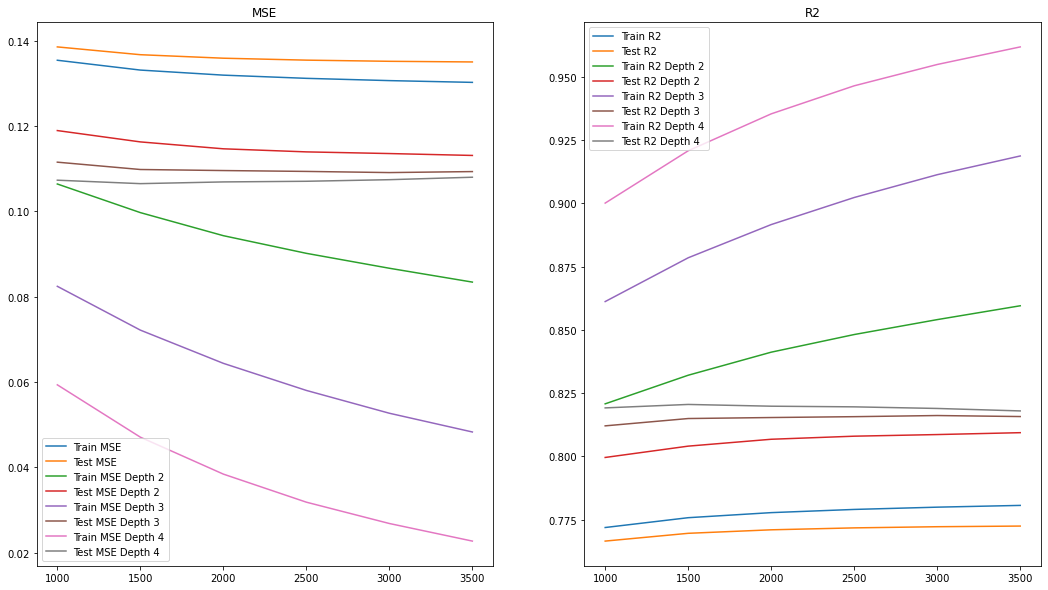

In [95]:
# plotting the scores on two different plots
fig, axs = plt.subplots(1,2, figsize=(18,10))
axs[0].plot(n_estimators_list, train_mse_1_2, label='Train MSE')
axs[0].plot(n_estimators_list, test_mse_1_2, label='Test MSE')
axs[0].plot(n_estimators_list, train_mse_2_2, label='Train MSE Depth 2')
axs[0].plot(n_estimators_list, test_mse_2_2, label='Test MSE Depth 2')
axs[0].plot(n_estimators_list, train_mse_3_2, label='Train MSE Depth 3')
axs[0].plot(n_estimators_list, test_mse_3_2, label='Test MSE Depth 3')
axs[0].plot(n_estimators_list, train_mse_4_2, label='Train MSE Depth 4')
axs[0].plot(n_estimators_list, test_mse_4_2, label='Test MSE Depth 4')
axs[0].set_title('MSE')
axs[0].legend()

axs[1].plot(n_estimators_list, train_r2_1_2, label='Train R2')
axs[1].plot(n_estimators_list, test_r2_1_2, label='Test R2')
axs[1].plot(n_estimators_list, train_r2_2_2, label='Train R2 Depth 2')
axs[1].plot(n_estimators_list, test_r2_2_2, label='Test R2 Depth 2')
axs[1].plot(n_estimators_list, train_r2_3_2, label='Train R2 Depth 3')
axs[1].plot(n_estimators_list, test_r2_3_2, label='Test R2 Depth 3')
axs[1].plot(n_estimators_list, train_r2_4_2, label='Train R2 Depth 4')
axs[1].plot(n_estimators_list, test_r2_4_2, label='Test R2 Depth 4')
axs[1].set_title('R2')
axs[1].legend()

plt.show()

The best model that we created is gradient boosting with n_estimators=2000, learning_rate=0.1 and max_depth=2.

In [96]:
# creating the best model
gb_model_best = GradientBoostingRegressor(n_estimators=2000, max_depth=2, learning_rate=0.1, random_state=42)

# fitting the best model
gb_model_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=2000, random_state=42)

In [97]:
# predicting y_train and y_test
y_train_pred_best = gb_model_best.predict(X_train)
y_test_pred_best = gb_model_best.predict(X_test)

In [98]:
# calculating MSE and R2 scores for train and test
gb_train_best_mse = mean_squared_error(y_train, y_train_pred_best)
gb_test_best_mse = mean_squared_error(y_test, y_test_pred_best)

gb_train_best_r2 = r2_score(y_train, y_train_pred_best)
gb_test_best_r2 = r2_score(y_test, y_test_pred_best)

# display MSE and R2 scores
print(f'GB Model Train MSE: {gb_train_best_mse}')
print(f'GB Model Test MSE: {gb_test_best_mse}')

print(f'GB Model Train R2: {gb_train_best_r2}')
print(f'GB Model Test R2: {gb_test_best_r2}')

GB Model Train MSE: 0.09687840957457819
GB Model Test MSE: 0.1187939061524705
GB Model Train R2: 0.8368071502422304
GB Model Test R2: 0.8050084905058467


# Training the Model w/ Large Dataset

In [25]:
# use the created function to impute the missing values and create missing value dummy variable
missing_value_impute(large_df)

In [26]:
# construct logarithm car price feature
large_df['log_price'] = np.log(large_df['price'])

In [27]:
# list of categorical columns
num_col = ['year', 'odometer', 'cylinders', 'description_length']

cat_col = ['transmission', 'drive', 'type', 'paint_color',
          'size', 'title_status', 'condition', 'fuel',
          'state', 'manufacturer', 'description_credit', 'description_owner', 
            'description_badcredit', 'missing_value']

In [28]:
# using function to create new large df and the list of dummy column names
new_large_df, dummy_col = get_dummies(large_df)

# Split data into train and test set

In [29]:
# Set X and y
X = new_large_df.loc[:, num_col + dummy_col]
y = new_large_df['log_price']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Best Model

In [104]:
%%time
# creating the best model
gb_model_best = GradientBoostingRegressor(n_estimators=2000, max_depth=2, learning_rate=0.1, random_state=42)

# fitting the best model
gb_model_best.fit(X_train, y_train)

Wall time: 12min 53s


GradientBoostingRegressor(max_depth=2, n_estimators=2000, random_state=42)

In [105]:
# predicting y_train and y_test
y_train_pred_best = gb_model_best.predict(X_train)
y_test_pred_best = gb_model_best.predict(X_test)

In [106]:
# calculating MSE and R2 scores for train and test
gb_train_best_mse = mean_squared_error(y_train, y_train_pred_best)
gb_test_best_mse = mean_squared_error(y_test, y_test_pred_best)

gb_train_best_r2 = r2_score(y_train, y_train_pred_best)
gb_test_best_r2 = r2_score(y_test, y_test_pred_best)

# display MSE and R2 scores
print(f'GB Model Train MSE: {gb_train_best_mse}')
print(f'GB Model Test MSE: {gb_test_best_mse}')

print(f'GB Model Train R2: {gb_train_best_r2}')
print(f'GB Model Test R2: {gb_test_best_r2}')

GB Model Train MSE: 0.10942469694016607
GB Model Test MSE: 0.11083590166048922
GB Model Train R2: 0.816638587238133
GB Model Test R2: 0.8128705716351073


# Save Model

In [107]:
# import pickle library to save model
import pickle

In [108]:
# create file name
pkl_filename = "Assignment4_model.pkl"  

In [109]:
# save model to file
with open(pkl_filename, 'wb') as file:  
    pickle.dump(gb_model_best, file)

# Load Model

In [110]:
# # Load the model using the save file
# with open(pkl_filename, 'rb') as file:  
#     gb_model = pickle.load(file)

# gb_model

# Key Features

In [111]:
# retrieve our feature importance from the model
feature_importance = pd.Series(gb_model_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

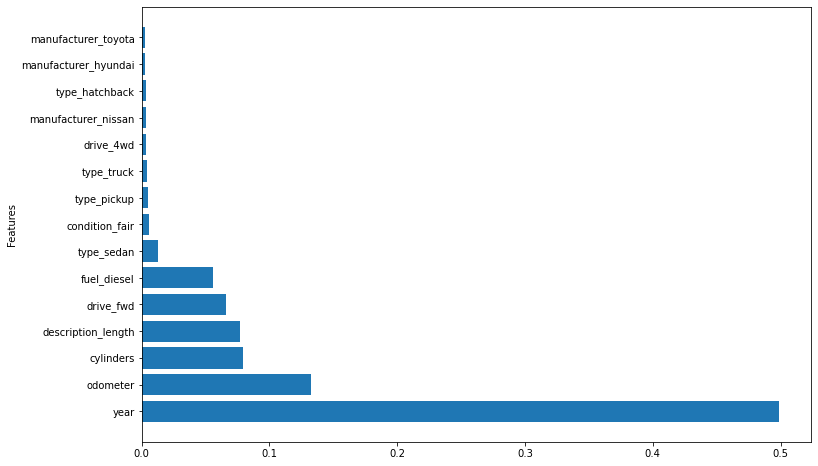

In [112]:
# plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance.index[:15], feature_importance.values[:15])
plt.ylabel('Features')
plt.show()

# Submission 2 - Uses Test Data

In [50]:
# loading the test data set
test_df = pd.read_csv('6Zz. final_predcomp_test_data (1).csv')

In [51]:
# Redefining function to impute missing values again
def missing_value_impute(df):
  # let's create a dummy variable column for missing values by iterating through all columns
  # creating list to contain missing row indices
  missing_row = []

  # iterates through each row of large dataset
  for index, row in df.iterrows():
      
      # checks each column to see if there are any missing values
      missing_series = row.isnull()

      # if any of the columns return true, add to our missing row list
      if missing_series.any():
          missing_row.append(index)
  
  # adding the dummy variable column
  df.loc[missing_row, 'missing_value'] = 1

  # fill the dummy variable columns w/ 0 for rows w/ non-missing data
  df['missing_value'] = df['missing_value'].fillna(0)

  # creating a list for categorical and numerical values
  num_col = ['price', 'year', 'odometer', 'cylinders', 'description_length']

  cat_col = ['transmission', 'drive', 'type', 'paint_color',
            'size', 'title_status', 'condition', 'fuel',
            'state', 'manufacturer', 'description_credit',
             'description_owner', 'description_badcredit', 'missing_value']

  # imputing the missing values using the mean for numerical columns and mode for categorical
  # use for loop to loop through all columns
  for col in df.columns[1:]:
    if col in num_col:
      df[col] = df[col].fillna(df[col].mean())
    elif col in cat_col:
      df[col] = df[col].fillna(df[col].mode().values[0])

In [52]:
# use the created function to impute the missing values and create missing value dummy variable
missing_value_impute(test_df)

In [53]:
# construct logarithm car price feature
test_df['log_price'] = np.log(test_df['price'])

In [54]:
# list of categorical columns
num_col = ['year', 'odometer', 'cylinders', 'description_length']

cat_col = ['transmission', 'drive', 'type', 'paint_color',
          'size', 'title_status', 'condition', 'fuel',
          'state', 'manufacturer', 'description_credit', 'description_owner', 
            'description_badcredit', 'missing_value']

def get_dummies(df):
  '''
  This function takes the train/test dataset and creates dummy variables for the known categorical variables.
  '''
  # using pandas get dummies function to create dummy variables for each categorical item
  dummy_df = pd.get_dummies(df[cat_col[:10]])

  # saving dummy feature names to list
  dummy_features = list(dummy_df.columns)

  # merging original df w/ the new dummy variable columns
  new_df = df.merge(dummy_df, left_index=True, right_index=True)

  # return/output the new merged df and the dummy feature column names
  return new_df, dummy_features

In [55]:
# using function to create new large df and the list of dummy column names
new_test_df, dummy_col = get_dummies(test_df)

In [56]:
# splitting the test data set into X and y
# Set X and y
X_testdata = new_test_df.loc[:, num_col + dummy_col]
y_testdata = new_test_df['log_price']

In [57]:
# Import pickle library to load saved Best Model
import pickle

# Load the model using the save file
with open('Assignment4_model.pkl', 'rb') as file:  
    gb_model = pickle.load(file)

gb_model

GradientBoostingRegressor(max_depth=2, n_estimators=2000, random_state=42)

In [58]:
# Get unique list of columns from training and test data and then find the difference
missing_cols = set(X.columns) - set(X_testdata.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_testdata[c] = 0

# Ensure the order of columns in the test set is in the same order as the training set
X_testdata = X_testdata[X_train.columns]

In [59]:
# predicting y^ for test set using our model
test_predictions = gb_model.predict(X_testdata)

# calculating MSE and R-sq for test set
test_prediction_mse = mean_squared_error(y_testdata, test_predictions) 
test_prediction_r2 = r2_score(y_testdata, test_predictions)

# display MSE and R-sq
print(f'MSE Score: {test_prediction_mse}')
print(f'R-squared Score: {test_prediction_r2}')

MSE Score: 0.11196511538802033
R-squared Score: 0.8127468985808312
